In [15]:
#Project Goals
#To create a linear regression model that predicts the outcome for a tennis player based on their playing habits.
#By analyzing and modeling the Association of Tennis Professionals (ATP) data, 
#To determine what it takes to be one of the best tennis players in the world.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns



### Service Game Columns (Offensive)
**Aces**: number of serves by the player where the receiver does not touch the ball<br>
**DoubleFaults**: number of times player missed both first and second serve attempts<br>
**FirstServe**: % of first-serve attempts made<br>
**FirstServePointsWon**: % of first-serve attempt points won by the player<br>
**SecondServePointsWon**: % of second-serve attempt points won by the player<br>
**BreakPointsFaced**: number of times where the receiver could have won service game of the player<br>
**BreakPointsSaved**: % of the time the player was able to stop the receiver from winning service game when they had the chance<br>
**ServiceGamesPlayed**: total number of games where the player served<br>
**ServiceGamesWon**: total number of games where the player served and won<br>
**TotalServicePointsWon**: % of points in games where the player served that they won<br>
### Return Game Columns (Defensive)
**FirstServeReturnPointsWon**: % of opponents first-serve points the player was able to win<br>
**SecondServeReturnPointsWon**: % of opponents second-serve points the player was able to win<br>
**BreakPointsOpportunities**: number of times where the player could have won the service game of the opponent<br>
**BreakPointsConverted**: % of the time the player was able to win their opponent’s service game when they had the chance<br>
**ReturnGamesPlayed**: total number of games where the player’s opponent served<br>
**ReturnGamesWon**: total number of games where the player’s opponent served and the player won<br>
**ReturnPointsWon**: total number of points where the player’s opponent served and the player won<br>
**TotalPointsWon**: % of points won by the player<br>
### Outcomes
**Wins**: number of matches won in a year<br>
**Losses**: number of matches lost in a year<br>
**Winnings**: total winnings in USD($) in a year<br>
**Ranking**: ranking at the end of year

In [16]:
# load and investigate the data here:
tennis_data = pd.read_csv("tennis_stats.csv")
# print(tennis_data.head())
# print(tennis_data["Player"])
# print(tennis_data.columns)
# print(tennis_data.describe())
tennis_data.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


# perform exploratory analysis here:

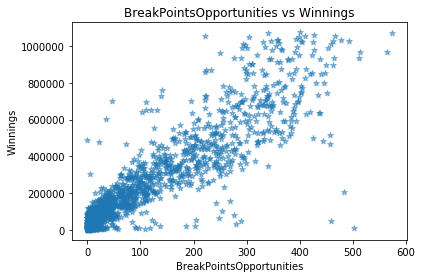

<Figure size 432x288 with 0 Axes>

In [13]:

#print(tennis_data.corr())

y = tennis_data["Winnings"]
x = tennis_data["BreakPointsOpportunities"]
plt.title('BreakPointsOpportunities vs Winnings')
plt.xlabel('BreakPointsOpportunities')
plt.ylabel('Winnings')
plt.scatter(x,y, marker = '*', alpha = 0.5)
plt.show()
plt.clf()



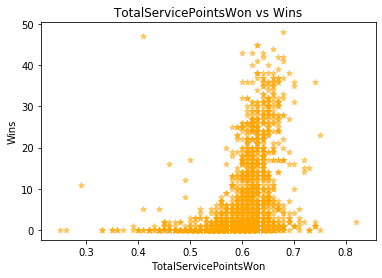

<Figure size 432x288 with 0 Axes>

In [3]:
plt.title('TotalServicePointsWon vs Wins')
plt.scatter(tennis_data['TotalServicePointsWon'],tennis_data['Wins'],marker = '*', alpha = 0.5,color = 'orange')
plt.xlabel('TotalServicePointsWon')
plt.ylabel('Wins')
plt.show()
plt.clf()



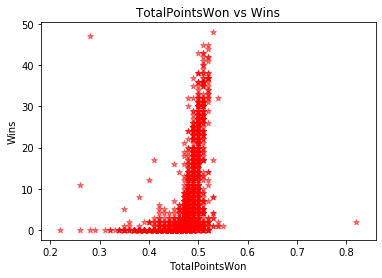

<Figure size 432x288 with 0 Axes>

In [17]:
plt.scatter(tennis_data['TotalPointsWon'],tennis_data['Wins'],marker = '*', alpha = 0.5,color = 'red')
plt.title('TotalPointsWon vs Wins')
plt.xlabel('TotalPointsWon')
plt.ylabel('Wins')
plt.show()
plt.clf()



Winnings with BreakPointsOpportunities Train Score: 0.789889448770189
Prediction of Winnings with BreakPointsOpportunities Test Score: 0.8775865856478037


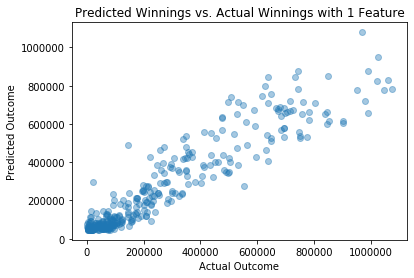

<Figure size 432x288 with 0 Axes>

In [21]:
## I classified my model as singleM which means Single Model. others can name it model or what they prefer.

#Single feature linear regressions with BreakPointsOpportunities :

x_features = tennis_data[["BreakPointsOpportunities"]]
y_winnings = tennis_data[["Winnings"]]

x_train, x_test, y_train, y_test = train_test_split(x_features, y_winnings, train_size = 0.8, test_size = 0.2)
singleM = LinearRegression()
singleM.fit(x_train, y_train)
pred = singleM.predict(x_test)
print('Winnings with BreakPointsOpportunities Train Score:',singleM.score(x_train,y_train))
print('Prediction of Winnings with BreakPointsOpportunities Test Score:',singleM.score(x_test,y_test))
plt.scatter(y_test,pred,marker = 'o', alpha = 0.4)
plt.title('Predicted Winnings vs. Actual Winnings with 1 Feature')
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.show()
plt.clf()





Wins with ServiceGamesPlayed Train Score: 0.861339991506038
Prediction of Wins with ServiceGamesPlayed Test Score: 0.8711052603742497


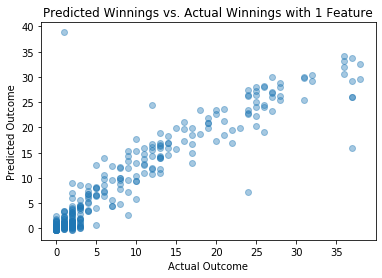

<Figure size 432x288 with 0 Axes>

In [22]:
#Another Single Feature Linear Regression with ServiceGamesPlayed
x_features = tennis_data[["ServiceGamesPlayed"]]
y_wins = tennis_data[["Wins"]]

x_train, x_test, y_train, y_test = train_test_split(x_features, y_wins, train_size = 0.8, test_size = 0.2)
singleM = LinearRegression()
singleM.fit(x_train, y_train)
pred1 = singleM.predict(x_test)
print('Wins with ServiceGamesPlayed Train Score:',singleM.score(x_train,y_train))
print('Prediction of Wins with ServiceGamesPlayed Test Score:',singleM.score(x_test,y_test))
plt.scatter(y_test,pred1,marker = 'o', alpha = 0.4)
plt.title('Predicted Winnings vs. Actual Winnings with 1 Feature')
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.show()
plt.clf()




Losses with "BreakPointsOpportunities" Train Score: 0.8220729341168767
Prediction of Losses with "BreakPointsOpportunities" Test Score: 0.8452367958585996


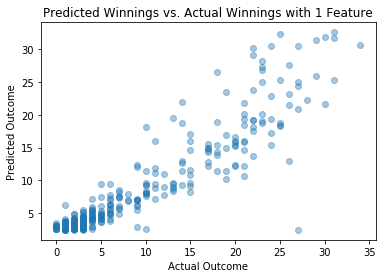

<Figure size 432x288 with 0 Axes>

In [23]:
#Another Single Feature Linear Regression with BreakPointsOpportunities
x_features = tennis_data[["BreakPointsOpportunities"]]
y_losses = tennis_data[["Losses"]]

x_train, x_test, y_train, y_test = train_test_split(x_features, y_losses, train_size = 0.8, test_size = 0.2)
singleM = LinearRegression()
singleM.fit(x_train, y_train)
pred2 = singleM.predict(x_test)
print('Losses with "BreakPointsOpportunities" Train Score:',singleM.score(x_train,y_train))
print('Prediction of Losses with "BreakPointsOpportunities" Test Score:',singleM.score(x_test,y_test))
plt.scatter(y_test,pred2,marker = 'o', alpha = 0.4)
plt.title('Predicted Winnings vs. Actual Winnings with 1 Feature')
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.show()
plt.clf()




Winnings with 2 Features Train Score: 0.8225024082689886
Prediction of Winnings with 2 Features Test Score: 0.770473823580592


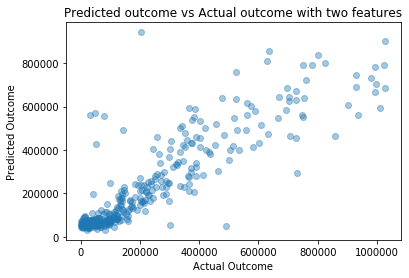

<Figure size 432x288 with 0 Axes>

In [24]:
#I classified my model as double which represent two features

# Two features linear regression
x_features = tennis_data[["BreakPointsOpportunities",'FirstServeReturnPointsWon']]
y_winnings = tennis_data[["Winnings"]]

x_train, x_test, y_train, y_test = train_test_split(x_features, y_winnings, train_size = 0.8, test_size = 0.2)
double = LinearRegression()
double.fit(x_train, y_train)
pred = double.predict(x_test)
print('Winnings with 2 Features Train Score:',double.score(x_train,y_train))
print('Prediction of Winnings with 2 Features Test Score:',double.score(x_test,y_test))
plt.scatter(y_test,pred, alpha = 0.4)
plt.title("Predicted outcome vs Actual outcome with two features")
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.show()
plt.clf()


Winnings with 2 Features Train Score: 0.8439323029170095
Prediction of Winnings with 2 Features Test Score: 0.7984960476802815


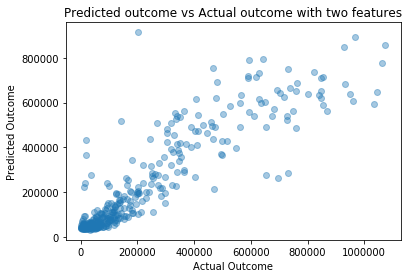

<Figure size 432x288 with 0 Axes>

In [25]:
#Another two features linear regression
x_features = tennis_data[["BreakPointsOpportunities",'ServiceGamesPlayed']]
y_winnings = tennis_data[["Winnings"]]

x_train, x_test, y_train, y_test = train_test_split(x_features, y_winnings, train_size = 0.8, test_size = 0.2)
double = LinearRegression()
double.fit(x_train, y_train)
pred = double.predict(x_test)

print('Winnings with 2 Features Train Score:', double.score(x_train,y_train))
print('Prediction of Winnings with 2 Features Test Score:', double.score(x_test,y_test))
plt.scatter(y_test,pred, alpha = 0.4)
plt.title("Predicted outcome vs Actual outcome with two features")
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.show()
plt.clf()




# DEFENSIVE 

Predicting Winnings with Multiple Features Test Score: 0.7663681087081716


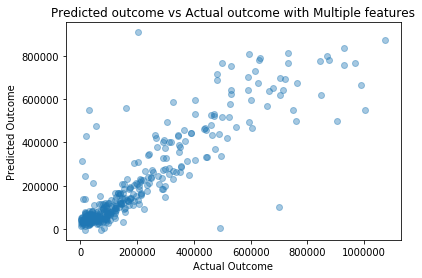

<Figure size 432x288 with 0 Axes>

In [10]:
#I classified my model as multiple which represent multiple features DEFENSIVE

## Multiple features linear regressions
x_features = tennis_data[["BreakPointsOpportunities",'ServiceGamesPlayed',"TotalPointsWon","TotalServicePointsWon","DoubleFaults","BreakPointsConverted",'SecondServeReturnPointsWon']]
y_winnings = tennis_data[["Winnings"]]

x_train, x_test, y_train, y_test = train_test_split(x_features, y_winnings, train_size = 0.8, test_size = 0.2)
multiple = LinearRegression()
multiple.fit(x_train, y_train)
pred = multiple.predict(x_test)
print('Predicting Winnings with Multiple Features Test Score:',multiple.score(x_test,y_test))
plt.scatter(y_test,pred, alpha = 0.4)
plt.title("Predicted outcome vs Actual outcome with Multiple features")
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.show()
plt.clf()





# OFFENSIVE

Winnings with Multiple Features Train Score: 0.8496421206260112
Predicting Winnings with Multiple Features Test Score: 0.7900608517719723


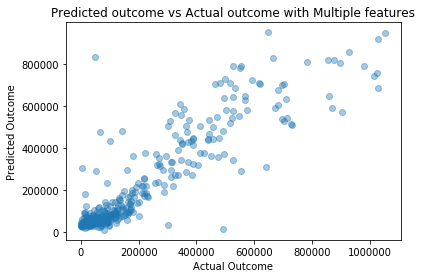

In [26]:
#Another Multiple  OFFENSIVE
x_features = tennis_data[["BreakPointsOpportunities",'ServiceGamesPlayed',"TotalPointsWon","TotalServicePointsWon","BreakPointsConverted",'SecondServeReturnPointsWon','BreakPointsConverted',"BreakPointsFaced","ReturnGamesWon","SecondServePointsWon"]]
y_winnings = tennis_data[["Winnings"]]

x_train, x_test, y_train, y_test = train_test_split(x_features, y_winnings, train_size = 0.8, test_size = 0.2)
multiple = LinearRegression()
multiple.fit(x_train, y_train)
pred = multiple.predict(x_test)
print('Winnings with Multiple Features Train Score:', multiple.score(x_train,y_train))
print('Predicting Winnings with Multiple Features Test Score:', multiple.score(x_test,y_test))
plt.title("Predicted outcome vs Actual outcome with Multiple features")
plt.scatter(y_test,pred, alpha = 0.4)
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.show()
